<a href="https://colab.research.google.com/github/mostafa-ja/sample/blob/master/PyTorch_Tutorial_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear Regression

In [2]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn import datasets

In [23]:
# 0) prepare data

X_numpy,y_numpy = datasets.make_regression(n_samples=100,n_features=1,noise=20,random_state=1) # shape :(100, 1) (100,)

X = torch.from_numpy(X_numpy.astype(np.float32))  # we will face this error if dont do <.astype(np.float32)> : expected scalar type Float but found Double
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0],1) #shape : (100,) to (100, 1)

n_samples,n_features = X.shape

In [24]:
X.dtype

torch.float32

In [22]:
X.dtype

torch.float64

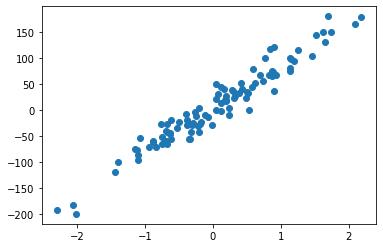

In [25]:
plt.scatter(X[:,0],y[:,0]);

In [26]:
# 1) model

input_size = n_features
output_size = 1

model = nn.Linear(input_size,output_size)

In [27]:
# 2) loss and optimizer

learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)

In [31]:
# 3) trainig

num_epochs = 100

for iter in range(num_epochs):

  # forward pass and loss
  y_pred = model(X)
  loss = criterion(y_pred,y)
  
  # backward pass 
  loss.backward()

  # update
  optimizer.step()
  optimizer.zero_grad()

  if (iter+1) % 10 == 0 :
    print(f'num_epochs = {iter+1} , loss = {loss.item():.4} ')


num_epochs = 10 , loss = 332.6 
num_epochs = 20 , loss = 332.6 
num_epochs = 30 , loss = 332.6 
num_epochs = 40 , loss = 332.6 
num_epochs = 50 , loss = 332.6 
num_epochs = 60 , loss = 332.6 
num_epochs = 70 , loss = 332.6 
num_epochs = 80 , loss = 332.6 
num_epochs = 90 , loss = 332.6 
num_epochs = 100 , loss = 332.6 


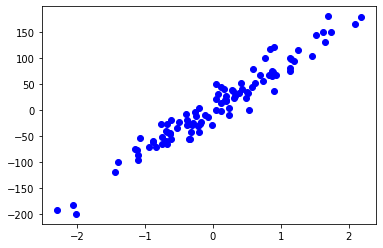

In [42]:
plt.scatter(X_numpy,y_numpy,c='b',label = 'data');

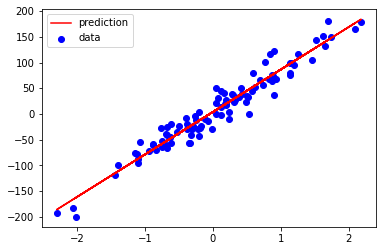

In [44]:
y_predict = model(X).detach()
y_predict_numpy = y_predict.numpy()

plt.scatter(X_numpy,y_numpy,c='b',label = 'data');
plt.plot(X_numpy,y_predict_numpy,c='r',label='prediction');
plt.legend();

In [55]:
[w,b] = model.parameters()
print(f'weight = {w.item():.4} , bias = {b.item():.3} ')

weight = 82.45 , bias = 4.06 
